# Práctica 3: Modelo dinámico inverso de un robot y planteamiento de trayectoria

## Objetivo

Que el alumno resuelva la dinámica inversa de un manipulador serial, calculando el par necesario para desplazar el efector final de un punto inicial a un punto final a lo largo de una trayectoria lineal.


### Metas 

- Que el alumno aplique un modelo cinemático inverso para calcular una trayectoria a partir de una posición actual hacia una posición final
- Que el alumno aplique un modelo de dinámica inversa a través del método de Euler Lagrange para calcular los pares en las juntas del robot
- Que el alumno grafique y analice los resultados del modelo
- Que el alumno configure un repositorio en línea e incluya en éste su práctica

### Contribución al perfil del egresado

La siguiente práctica contribuye en los siguientes puntos al perfil del egresado:

#### Aptitudes y habilidades

- Para modelar, simular e interpretar el comportamiento de los sistemas mecatrónicos.
- Para diseñar, construir, operar y mantener los sistemas mecatrónicos y sus componentes.

#### Actitudes

- Tener confianza en su preparación académica.
- Comprometido con su actualización, superación y competencia profesional.

#### De tipo social

- Promover el cambio en la mentalidad frente a la competitividad internacional.

## Rúbrica de evaluación

La evaluación de la práctica contará de los siguientes puntos y se evaluará con los siguientes criterios:

| Elemento | Porcentaje |
|------| -----------:|
| **Cuestionario previo** | 15% | 
| **Desarrollo** | 35% |
| **Análisis de resultados**  | 35% |
| **Conclusiones** | 15% |

<br>

| Elemento | Malo | Regular | Bueno |
| :------| ------ | --------| ------|
| **Cuestionario previo** | El trabajo no contiene cuestionario previo o todas las preguntas son incorrectas (0%)| Al menos la mitad de las preguntas son correctas (8%) |  Todas las preguntas son correctas (15%) |
| **Desarrollo** | El trabajo no contiene desarrollo o su planteamiento no concuerda con lo deseado (0%) | El desarrollo está mal planteado o no llega a los resultados esperados (10%) | El desarrollo tiene un planteamiento adecuado y llega a los resultados esperados (35%) |
| **Análisis de resultados**  | El trabajo no contiene análisis de resultados o la información no se está interpretando correctamente (0%) | La interpretación de los resultados es parcial o desorganizada (10%) | Realiza un correcto análisis de los resultados de forma organizada   (35%) |
| **Conclusiones** | El trabajo no contiene conclusiones o no hacen referencia al trabajo desarrollado y los objetivos planteados (0%) | La redacción de las conclusiones es desorganizada o confusa (8%) | Las conclusiones del trabajo son claras y hacen referencia al trabajo desarrollado y los objetivos planteados (15%) | 



## Introducción

### Modelo dinámico
El modelo dinámico de un sistema permite analizar el movimiento del cuerpo atendiendo a las causas que lo originan (fuerzas y pares)
En particular, para un manipulador serial, permite relacionar el par aplicado en las juntas de un robot con la posición del efector final, considerando fenómenos como la masa y la inercia.

### Modelo dinámico inverso
El modelo dinámico inverso permite conocer la posición del efector final en términos de los pares de las juntas. Para esto, se pueden tomar dos aproximaciones

### Ecuaciones de propagación
Las ecuaciones de propagación de velocidad permiten relacionar cómo el comportamiento de un eslabón dentro de una cadena cinemática afecta a los otros eslabones dentro de la cadena. Se puede analizar la propagación de las fuerzas y de la velocidad dentro de una cadena.

### Modelo Newton-Euler
Las ecuaciones de Newton-Euler relacionan la cantidad de movimiento lineal y angular con las fuerzas y pares a los que es sometido cada uno de los eslabones

### Modelo Euler-Lagrange
El modelo de Euler-Lagrange permite relacionar la energía cinética y potencial con las perturbaciones dentro de un sistema, a través del principio de mínima acción. 

## Cuestionario previo

Responder de forma breve las siguientes preguntas:

- ¿Qué es el análisis de dinámica inversa y qué nos permite obtener?
> El análisis de dinámica inversa consiste en calcular los torques o fuerzas necesarias en las articulaciones de un robot para generar un movimiento previamente definido, con base en las posiciones, velocidades y aceleraciones articulares, así como en las fuerzas externas que actúan sobre el sistema. Este modelo matemático es fundamental tanto en el diseño como en la operación de robots.
- ¿A través de qué modelados se puede realizar un análisis de dinámica inversa?
> El análisis de dinámica inversa se puede realizar principalmente a través de dos enfoques de modelado bien establecidos en la robótica:  
> 
> 1. Modelo basado en la formulación de Lagrange
> - Se basa en principios de la energía cinética y potencial del sistema.  
> - Utiliza el lagrangiano \( L = T - V \), donde:  
>   - \( T \) es la energía cinética  
>   - \( V \) es la energía potencial  
> - Permite derivar de forma sistemática las ecuaciones del movimiento para sistemas con múltiples grados de libertad.  
> - Es útil cuando se desea un modelo compacto, basado en coordenadas generalizadas.  
> 
> 2. Modelo basado en la formulación de Newton-Euler
> - Se basa en las leyes de Newton (fuerza) y Euler (momento), aplicadas a cada eslabón del robot.  
> - Requiere un análisis cinemático hacia adelante (velocidades y aceleraciones) y un análisis dinámico hacia atrás (fuerzas y torques).  
> - Es computacionalmente eficiente y común en robótica industrial y control en tiempo real.  
> - Se adapta bien a estructuras con múltiples eslabones, como robots seriales.
- ¿De qué condiciones o fenómenos físicos dependen los pares en las juntas de un robot para seguir una trayectoria?  
> Los pares (torques) en las juntas de un robot necesarios para seguir una trayectoria específica dependen de varios fenómenos físicos y condiciones dinámicas del sistema [3]. Entre los principales se encuentran:  
> - **Aceleraciones y velocidades articulares**: El par requerido en cada articulación depende de la aceleración angular (o lineal) deseada, además de la velocidad angular actual, debido a efectos inerciales y centrífugos.  
> - **Masa y geometría del robot**: Las matrices de inercia, que dependen de la distribución de masa y la forma de los eslabones, influyen directamente en los torques. Robots con eslabones largos o pesados requieren más par.  
> - **Gravedad**: Las articulaciones deben generar pares para sostener el peso de los eslabones en diferentes configuraciones.  
> - **Fuerzas externas y de contacto**: Si el robot interactúa con objetos o el entorno, los pares deben compensar esas fuerzas.  
> - **Fricción en las juntas**: La fricción estática y dinámica añade resistencia, lo que incrementa el torque necesario.  
> - **Reducciones o relaciones de transmisión**: Los engranajes o reductores modifican la relación entre par y velocidad, afectando el torque real.  
> Estos factores se integran en modelos dinámicos inversos expresados como ecuaciones diferenciales algebraicas (DAE), que permiten calcular los torques articulares necesarios para una trayectoria dada [2].  

- ¿Cómo se aplica la derivada total de una función que está en términos de otras variables que a su vez están en términos de la variable respecto a la que se realiza la derivada total?  
> Supongamos que tienes una función:  
> z=f(x,y) 
> pero x y y dependen de otra variable, por ejemplo t:  
> x = x(t), y = y(t) 
> Entonces, la derivada total de z con respecto a t se calcula con la regla de la cadena:  
>  
> \(\displaystyle \frac{dz}{dt} = \frac{\partial f}{\partial x} \cdot \frac{dx}{dt} + \frac{\partial f}{\partial y} \cdot \frac{dy}{dt} \) 
>  
> Esta expresión toma en cuenta cómo cambian x y y con t, y cómo esos cambios afectan el valor de z [4].


En caso de integrar imagenes, colocarlas en la carpeta *"imagenes"*

## Desarrollo

### 1. Planteamiento de la cinemática inversa y obtención de la trayectoria
En esta primera parte, se realiza el análisis de la cinemática inversa, que permite obtener las posiciones, velocidades y aceleraciones de las juntas del robot, dada **una posición inicial de las juntas y una posición final del efector final**. Se puede retomar de la práctica anterior. 
Un diagrama del robot se muestra en la imagen:

<img src="imagenes/p3_1.png" alt = "Robot RRR" width="300" height="300" display= "block"/>

** Considerar valores cualesquiera para las dimensiones de los eslabones y la posición inicial de las juntas

In [1]:
###Código de cinemática directa pero se usarán algunas funciones del mismo por eso se debe correr al inicio
#!/usr/bin/env python3 
from sympy import *
import matplotlib
import matplotlib.pyplot as plt

class GeneradorTrayectoria():
  def __init__(self, dim = (0.3, 0.2, 0.1)):
    self.dim = dim
  def trans_homo(self, x, y, z, gamma, beta, alpha):
    R_z = Matrix([ [cos(alpha), -sin(alpha), 0], [sin(alpha), cos(alpha), 0],[0, 0, 1]])
    R_y = Matrix([ [cos(beta), 0, -sin(beta)], [0, 1, 0],[sin(beta), 0, cos(beta)]])
    R_x = Matrix([ [1, 0, 0], [0, cos(gamma), -sin(gamma)],[0, sin(gamma), cos(gamma)]])
    R = R_x * R_y *R_z
    p = Matrix([[x],[y],[z]])
    T = Matrix.vstack(Matrix.hstack(R, p), Matrix([[0,0,0,1]]))
    return T 
  def cinematica_directa(self):
    print("Generando cinematica directa")
    self.theta_0_1, self.theta_1_2, self.theta_2_3 = symbols("theta_0_1 theta_1_2 theta_2_3")
    #Matrices de transformación
    self.T_0_1 = self.trans_homo(0, 0, 0, pi/2, 0, self.theta_0_1)
    self.T_1_2 = self.trans_homo(self.dim[0], 0, 0, 0, 0, self.theta_1_2)
    self.T_2_3 = self.trans_homo(self.dim[1], 0, 0, 0, 0, self.theta_2_3)
    self.T_3_P = self.trans_homo(self.dim[2], 0, 0, 0, 0, 0)
    self.T_0_P = simplify(self.T_0_1 * self.T_1_2 * self.T_2_3 * self.T_3_P)
    #Vector de postura xi = [x z th]
    self.xi_0_P = Matrix([[self.T_0_P[0, 3]],
                          [self.T_0_P[2, 3]],
                          [self.theta_0_1 + self.theta_1_2 + self.theta_2_3]])
  def generar_trayectoria(self, q_in = (pi/6, pi/4, pi/3), xi_fn = (0.5, 0.2, 0), tie = (0, 2), frec = 30):
    print("Creando trayectoria")
    #Variables para polinomio lambda
    self.t, self.a_0, self.a_1, self.a_2, self.a_3, self.a_4, self.a_5 = symbols(
    "t a_0 a_1 a_2 a_3 a_4 a_5")
    #Polinomio lambda lam = a0 + a1t + a2t^2 + a3t^3 + a4t^4 + a5t^5
    self.lam = self.a_0 + self.a_1 * self.t + self.a_2 * (self.t)**2 + self.a_3 * (self.t)**3 + self.a_4 * (self.t)**4+ self.a_5 * (self.t)**5
    #Primera y segunda derivada de lambda
    self.lam_dot = diff(self.lam, self.t)
    self.lam_dot_dot = diff(self.lam_dot, self.t)
    # Cálculo de parámetros de lambda. 
    # Planteando ecuaciones igualadas a cero
    # lam(t=ti) = 0
    # lam(t=tf) = 1   ==>  lam(t=tf) -1 = 0
    # lam'(t=ti) = 0
    # lam'(t=tf) = 0
    # lam''(t=ti) = 0
    # lam''(t=tf) = 0
    ec_1 = self.lam.subs(self.t, tie[0])
    ec_2 = self.lam.subs(self.t, tie[1]) - 1
    ec_3 = self.lam_dot.subs(self.t, tie[0])
    ec_4 = self.lam_dot.subs(self.t, tie[1])
    ec_5 = self.lam_dot_dot.subs(self.t, tie[0])
    ec_6 = self.lam_dot_dot.subs(self.t, tie[1])
    # Resolviendo sistema para las variables a0-a5
    terminos = solve([ec_1, ec_2, ec_3, ec_4, ec_5, ec_6], [self.a_0, self.a_1, self.a_2, self.a_3, self.a_4, self.a_5], dict = True)
    # Tomando la primera solución devuelta y sustituyéndola en el polinomio
    self.lam_s          = self.lam.subs(terminos[0])
    self.lam_dot_s      = self.lam_dot.subs(terminos[0])
    self.lam_dot_dot_s  = self.lam_dot_dot.subs(terminos[0])

    # Calculo de la posicion inicial del efector final a partir del vector de postura
    xi_in = self.xi_0_P.subs({
      self.theta_0_1: q_in[0],
      self.theta_1_2: q_in[1],
      self.theta_2_3: q_in[2]
    })
    # Posiciones de espacio de trabajo
    # xi = xi_in + lam(t) * (xi_fn - xi_in) 
    self.xi = xi_in + Matrix([
      [self.lam_s * (xi_fn[0] - xi_in[0])],
      [self.lam_s * (xi_fn[1] - xi_in[1])],
      [self.lam_s * (xi_fn[2] - xi_in[2])]
    ])
    # Velocidades de espacio de trabajo
    # xi' = lam'(t) * (xi_fn - xi_in)
    self.xi_dot = Matrix([
      [self.lam_dot_s * (xi_fn[0] - xi_in[0])],
      [self.lam_dot_s * (xi_fn[1] - xi_in[1])],
      [self.lam_dot_s * (xi_fn[2] - xi_in[2])]
    ])
    # Aceleraciones de espacio de trabajo
    # xi'' = lam''(t) * (xi_fn - xi_in)
    self.xi_dot_dot = Matrix([
      [self.lam_dot_dot_s * (xi_fn[0] - xi_in[0])],
      [self.lam_dot_dot_s * (xi_fn[1] - xi_in[1])],
      [self.lam_dot_dot_s * (xi_fn[2] - xi_in[2])]
    ])
    print("Vector segunda derivada")
    print(self.xi)
    print(self.xi_dot)
    print(self.xi_dot_dot)

    # Muestreo del espacio de trabajo
    print("Muestreando trayectoria")
    # Número de muestras e incremento de tiempo
    self.muestras = int(frec * (tie[1] - tie[0]) + 1)
    self.dt = 1.0 / frec

    # Muestreo de tiempo entre tf y ti
    self.t_m = Matrix.zeros(1, self.muestras)
    self.t_m[0,0] = tie[0]
    for a in range(self.muestras - 1):
      self.t_m[0, a + 1] = self.t_m[0, a] + self.dt

    # Matrices vacías para guardar valores del espacio de trabajo
    # 3 filas, n columnas (cada columna es una posición/velocidad/aceleración del espacio de trabajo en un instante)
    self.xi_m         = Matrix.zeros(3, self.muestras)
    self.xi_dot_m     = Matrix.zeros(3, self.muestras)
    self.xi_dot_dot_m = Matrix.zeros(3, self.muestras)

    # Generando funciones para evitar usar lenguaje simbólico en las sustituciones
    xi_m_func =         lambdify([self.t], self.xi)
    xi_dot_m_func =     lambdify([self.t], self.xi_dot)
    xi_dot_dot_m_func = lambdify([self.t], self.xi_dot_dot)
    for a in range(self.muestras):
      """Así se sustituiría directo
      self.xi_m[:,a]          = self.xi.subs(self.t, self.t_m[0, a])
      self.xi_dot_m[:,a]      = self.xi_dot.subs(self.t, self.t_m[0, a])
      self.xi_dot_dot_m[:,a]  = self.xi_dot_dot.subs(self.t, self.t_m[0, a])"""
      self.xi_m[:, a]         = xi_m_func(float(self.t_m[0, a]))
      self.xi_dot_m[:, a]     = xi_dot_m_func(float(self.t_m[0, a]))
      self.xi_dot_dot_m[:, a] = xi_dot_dot_m_func(float(self.t_m[0, a]))
      print(a)

    #Agregando posición inicial como variable de la clase
    self.q_in = q_in


  def cinematica_inversa(self):
    print("Calculando cinematica inversa")
    # Variables para los valores de las velocidades del ws
    self.x_0_P_dot, self.z_0_P_dot, self.theta_0_P_dot = symbols(
    "x_0_P_dot z_0_P_dot theta_0_P_dot")
    # Derivada del vector de postura en términos de las velocidades del efector final
    # xi' = [x' z' th'] 
    self.xi_dot = Matrix([[self.x_0_P_dot], [self.z_0_P_dot], [self.theta_0_P_dot]])
    # Jacobiano
    self.J = Matrix.hstack(diff(self.xi_0_P, self.theta_0_1), 
                           diff(self.xi_0_P, self.theta_1_2), 
                           diff(self.xi_0_P, self.theta_2_3))
    self.J_inv = self.J.inv()
    # De la primera derivada, despejamos q': 
    # xi' = J * q'
    # q' = J-1 * xi'
    self.q_dot = self.J_inv * self.xi_dot

    # Crear una función a partir de la expresión simbólica
    q_dot_func = lambdify([self.x_0_P_dot, self.z_0_P_dot, self.theta_0_P_dot, self.theta_0_1, self.theta_1_2, self.theta_2_3], self.q_dot)

    # Matrices vacías para los valores de espacio de las juntas
    self.q_m         = Matrix.zeros(3, self.muestras)
    self.q_dot_m     = Matrix.zeros(3, self.muestras)
    self.q_dot_dot_m = Matrix.zeros(3, self.muestras)
    # Agregando posición inicial (dato)
    self.q_m[:,0] = Matrix([[self.q_in[0]], [self.q_in[1]], [self.q_in[2]]])
    # Agregando velocidad inicial
    # q' = J-1 * xi' => Obtenemos velocidad de las juntas 
    # en el punto actual sustituyendo velocidad actual del efector y 
    # posición actual de las juntas
    """Así se sustituiría directo
      q_dot_m[:,0] = self.q_dot.subs({
      self.x_0_P_dot:     xi_dot_m[0, 0],
      self.z_0_P_dot:     xi_dot_m[1, 0],
      self.theta_O_P_dot: xi_dot_m[2, 0],
      self.theta_O_1:     q_m[0, 0],
      self.theta_1_2:     q_m[1, 0],
      self.theta_2_3:     q_m[2, 0]})"""

    self.q_dot_m[:, 0] = q_dot_func(
        float(self.xi_dot_m[0, 0]),
        float(self.xi_dot_m[1, 0]),
        float(self.xi_dot_m[2, 0]),
        float(self.q_m[0, 0]),
        float(self.q_m[1, 0]),
        float(self.q_m[2, 0])
    )

    print("Calculando puntos")
    for a in range(self.muestras - 1):
      # Posición de las juntas
      # Posición siguiente = posición actual + velocidad actual * dt 
      self.q_m[:,a+1] = self.q_m[:,a] + self.q_dot_m[:,a] * self.dt
      # Velocidad de las juntas 
      # Velocidad siguiente de las juntas a partir de velocidad siguiente del efector y posición siguiente de las juntas
      """self.q_dot_m[:,a+1] = self.q_dot.subs({
                                          self.x_0_P_dot:     xi_dot_m[0, a],
                                          self.z_0_P_dot:     xi_dot_m[1, a],
                                          self.theta_O_P_dot: xi_dot_m[2, a],
                                          self.theta_O_1:     q_m[0, a],
                                          self.theta_1_2:     q_m[1, a],
                                          self.theta_2_3:     q_m[2, a]})"""
      self.q_dot_m[:, a + 1] = q_dot_func(
        float(self.xi_dot_m[0, a + 1]),
        float(self.xi_dot_m[1, a + 1]),
        float(self.xi_dot_m[2, a + 1]),
        float(self.q_m[0, a + 1]),
        float(self.q_m[1, a + 1]),
        float(self.q_m[2, a + 1]))
        
      # Aceleración
      # Aceleración actual = velocidad siguiente - velocidad actual / dt
      self.q_dot_dot_m[:,a] = (self.q_dot_m[:,a+1] - self.q_dot_m[:,a]) / self.dt

      print("Iteración: " + str(a))
    # Aceleración final (cero)
    self.q_dot_dot_m[:, self.muestras - 1] = Matrix.zeros(3, 1)
    
  def graficar(self):
    fig, ((xi_g, xi_dot_g, xi_dot_dot_g),
              (q_g, q_dot_g, q_dot_dot_g)) = plt.subplots(nrows=2, ncols = 3)
    # Posiciones ws
    xi_g.set_title("Posiciones de WS")
    xi_g.plot(self.t_m.T, self.xi_m[0, :].T, color = "RED")
    xi_g.plot(self.t_m.T, self.xi_m[1, :].T, color = "GREEN")
    xi_g.plot(self.t_m.T, self.xi_m[2, :].T, color = "BLUE")

    # Velocidades ws
    xi_dot_g.set_title("Velocidades de WS")
    xi_dot_g.plot(self.t_m.T, self.xi_dot_m[0, :].T, color = "RED")
    xi_dot_g.plot(self.t_m.T, self.xi_dot_m[1, :].T, color = "GREEN")
    xi_dot_g.plot(self.t_m.T, self.xi_dot_m[2, :].T, color = "BLUE")

    # Aceleraciones ws
    xi_dot_dot_g.set_title("Aceleraciones de WS")
    xi_dot_dot_g.plot(self.t_m.T, self.xi_dot_dot_m[0, :].T, color = "RED")
    xi_dot_dot_g.plot(self.t_m.T, self.xi_dot_dot_m[1, :].T, color = "GREEN")
    xi_dot_dot_g.plot(self.t_m.T, self.xi_dot_dot_m[2, :].T, color = "BLUE")

    # Posiciones q
    q_g.set_title("Posiciones de q")
    q_g.plot(self.t_m.T, self.q_m[0, :].T, color = "RED")
    q_g.plot(self.t_m.T, self.q_m[1, :].T, color = "GREEN")
    q_g.plot(self.t_m.T, self.q_m[2, :].T, color = "BLUE")

    # Velocidades q
    q_dot_g.set_title("Velocidades de q")
    q_dot_g.plot(self.t_m.T, self.q_dot_m[0, :].T, color = "RED")
    q_dot_g.plot(self.t_m.T, self.q_dot_m[1, :].T, color = "GREEN")
    q_dot_g.plot(self.t_m.T, self.q_dot_m[2, :].T, color = "BLUE")

    # Aceleraciones q
    q_dot_dot_g.set_title("Aceleraciones de q")
    q_dot_dot_g.plot(self.t_m.T, self.q_dot_dot_m[0, :].T, color = "RED")
    q_dot_dot_g.plot(self.t_m.T, self.q_dot_dot_m[1, :].T, color = "GREEN")
    q_dot_dot_g.plot(self.t_m.T, self.q_dot_dot_m[2, :].T, color = "BLUE")
    plt.show()
  def graficar_ws(self):
    plt.plot(self.xi_m[0, :].T, self.xi_m[1, :].T)
    plt.axis((0, 1, 0, 1))
    plt.show()
  def graficar_trayectoria(self):
    # Cinematica directa de cada sistema de referencia
    self.T_0_2 = self.T_0_1 * self.T_1_2
    self.T_0_3 = self.T_0_2 * self.T_2_3
    
    plt.plot(self.xi_m[0, :].T, self.xi_m[1, :].T)
    plt.axis((0, 1, 0, 1))
    plt.show()

### 2. Planteamiento de la dinámica inversa

### a) Planteamiento de la dinámica inversa: Matrices de inercia

Calcular las matrices de inercia de los eslabones considerando que su centro de masa concide con su centroide y constan de un prisma con las dimensiones usadas en el archivo URDF del robot.

In [2]:
class GeneradorDinamica(GeneradorTrayectoria):
  def __init__(self):
    super().__init__()
  def matriz_inercia(self, lx, ly, lz, masa):
    return Matrix([[(masa/12.0)*(ly**2 + lz**2), 0, 0], 
                  [0, (masa/12.0)*(lx**2 + lz**2), 0], 
                  [0, 0, (masa/12.0)*(lx**2 + ly**2)]])
  def definir_inercia(self, masas = [0.25, 0.25, 0.25]):
    # Cinematica directa de cada sistema de referencia
    self.T_0_2 = self.T_0_1 * self.T_1_2
    self.T_0_3 = self.T_0_2 * self.T_2_3
    # Transformaciones de centros de masa
    self.T_1_C1 = self.trans_homo(self.dim[0] / 2, 0, 0, 0, 0, 0)
    self.T_2_C2 = self.trans_homo(self.dim[1] / 2, 0, 0, 0, 0, 0)
    self.T_3_C3 = self.trans_homo(self.dim[2] / 2, 0, 0, 0, 0, 0)
    self.T_0_C1 = simplify(self.T_0_1 * self.T_1_C1)
    self.T_0_C2 = simplify(self.T_0_2 * self.T_2_C2)
    self.T_0_C3 = simplify(self.T_0_3 * self.T_3_C3)
    # Masas
    self.m1 = masas[0]
    self.m2 = masas[1]
    self.m3 = masas[2]

### b) Planteamiento de la dinámica inversa: Posiciones de los centros de masa
A partir de las matrices de transformación homogénea, obtener la posición de los centros de masa de los eslabones.

In [3]:
def posiciones_centro_masa_ex(self):
    #Vectores de posición de sistemas de referencia
    self.p_0_1 = self.T_0_1[:3, 3]
    self.p_1_2 = self.T_1_2[:3, 3]
    self.p_2_3 = self.T_2_3[:3, 3]
    self.p_0_1 = self.T_0_1[:3, 3]
    self.p_0_2 = self.T_0_2[:3, 3]
    self.p_0_3 = self.T_0_3[:3, 3]
    #Vectores de posición de centros de masa
    self.p_1_C1 = self.T_1_C1[:3, 3]
    self.p_2_C2 = self.T_2_C2[:3, 3]
    self.p_3_C3 = self.T_3_C3[:3, 3]
    self.p_0_C1 = self.T_0_C1[:3, 3]
    self.p_0_C2 = self.T_0_C2[:3, 3]
    self.p_0_C3 = self.T_0_C3[:3, 3]
    #Rotaciones
    self.R_0_1 = self.T_0_1[:3, :3]
    self.R_1_2 = self.T_1_2[:3, :3]
    self.R_2_3 = self.T_2_3[:3, :3]
    self.Id = Matrix([[1,0,0], [0,1,0], [0,0,1]]) 

GeneradorDinamica.posiciones_centro_masa = posiciones_centro_masa_ex

### c) Planteamiento de la dinámica inversa: Velocidades de los centros de masa

A partir de las ecuaciones de propagación de la velocidad, obtener la velocidad lineal y angular de los centros de masa de los eslabones.

In [4]:
###Arreglo para obtener velocidades
def arreglo_velocidades_ex(self):
    # Variables de velocidad angular
    self.theta_0_1_dot = Symbol('theta_0_1_dot')
    self.theta_1_2_dot = Symbol('theta_1_2_dot')
    self.theta_2_3_dot = Symbol('theta_2_3_dot')
    # Variables de aceleración angular
    self.theta_0_1_dot_dot = Symbol('theta_0_1_dot_dot')
    self.theta_1_2_dot_dot = Symbol('theta_1_2_dot_dot')
    self.theta_2_3_dot_dot = Symbol('theta_2_3_dot_dot')
    # Matrices de inercia
    self.Ic1 = self.matriz_inercia(self.dim[0], 0.03, 0.03, self.m1)
    self.Ic2 = self.matriz_inercia(self.dim[1], 0.03, 0.03, self.m2)
    self.Ic3 = self.matriz_inercia(self.dim[2], 0.03, 0.03, self.m3)
    #Gravedad
    self.g = -9.81

GeneradorDinamica.arreglo_velocidades =arreglo_velocidades_ex

In [5]:
def velocidades_ex(self):
    #Velocidades angulares de sistemas
    omega_1_1 = Matrix([0, 0, self.theta_0_1_dot])
    omega_2_2 = self.R_1_2.transpose() @ omega_1_1 + Matrix([0, 0, self.theta_1_2_dot])
    omega_3_3 = self.R_2_3.transpose() @ omega_2_2 + Matrix([0, 0, self.theta_2_3_dot]) 
    #Velocidades angulares de centros de masa
    self.omega_1_C1 = omega_1_1
    self.omega_2_C2 = omega_2_2
    self.omega_3_C3 = omega_3_3
    omega_1_C1_f = lambdify([self.theta_0_1_dot], self.omega_1_C1)
    omega_2_C2_f = lambdify([self.theta_0_1_dot, self.theta_1_2_dot], self.omega_2_C2)
    omega_3_C3_f = lambdify([self.theta_0_1_dot, self.theta_1_2_dot, self.theta_2_3], self.omega_3_C3)
    #Velocidades lineales de sistemas
    self.v_1_1 = Matrix([0, 0, 0])
    self.v_2_2 = self.R_1_2.transpose() @ (self.v_1_1 + omega_1_1.cross(self.p_1_2))
    self.v_3_3 = self.R_2_3.transpose() @ (self.v_2_2 + omega_2_2.cross(self.p_2_3))
    #Velocidades lineales de centros de masa
    self.v_1_C1 = self.v_1_1 + self.omega_1_C1.cross(self.p_1_C1)
    self.v_2_C2 = self.v_2_2 + self.omega_2_C2.cross(self.p_2_C2)
    self.v_3_C3 = self.v_3_3 + self.omega_3_C3.cross(self.p_3_C3)
    self.v_1_C1_f = lambdify([self.theta_0_1, self.theta_0_1_dot], self.v_1_C1)
    self.v_2_C2_f = lambdify([self.theta_0_1, self.theta_0_1_dot, self.theta_1_2, self.theta_1_2_dot], self.v_2_C2)
    self.v_3_C3_f = lambdify([self.theta_0_1, self.theta_0_1_dot, self.theta_1_2, self.theta_1_2_dot, self.theta_2_3, self.theta_2_3_dot], self.v_3_C3)

    #Arreglos para guardar velocidades angulares
    # 3 filas, n columnas (cada columna es una velocidad angular del centro de masa en un instante)
    self.omega_1_C1_m = Matrix.zeros(3, self.muestras)
    self.omega_2_C2_m = Matrix.zeros(3, self.muestras)
    self.omega_3_C3_m = Matrix.zeros(3, self.muestras)
    #Arreglos para guardar velocidades lineales
    # 3 filas, n columnas (cada columna es una velocidad lineal del centro de masa en un instante)
    self.vel_1_C1_m = Matrix.zeros(3, self.muestras)
    self.vel_2_C2_m = Matrix.zeros(3, self.muestras)
    self.vel_3_C3_m = Matrix.zeros(3, self.muestras)
    #Ciclo para todas las muestras
    print("Calculando velocidades")
    for i in range(self.muestras):
      #Velocidades angulares
      self.omega_1_C1_m[:, i] = omega_1_C1_f(self.q_dot_m[0, i])
      self.omega_2_C2_m[:, i] = omega_2_C2_f(self.q_dot_m[0, i], self.q_dot_m[1, i])
      self.omega_3_C3_m[:, i] = omega_3_C3_f(self.q_dot_m[0, i], self.q_dot_m[1, i], self.q_dot_m[2, i])
      
      #Velocidades lineales
      """self.vel_1_C1_m[:, i] = v_1_C1_f(self.q_m[0, i], self.q_dot_m[0, i])
      self.vel_2_C2_m[:, i] = v_2_C2_f(self.q_m[0, i], self.q_dot_m[0, i], self.q_m[1, i], self.q_dot_m[1, i])
      self.vel_3_C3_m[:, i] = v_3_C3_f(self.q_m[0, i], self.q_dot_m[0, i], self.q_m[1, i], self.q_dot_m[1, i], self.q_m[2, i], self.q_dot_m[2, i])
"""
      self.vel_1_C1_m[:, i] = self.v_1_C1.subs({
        self.theta_0_1:     self.q_m[0, i],
        self.theta_0_1_dot: self.q_dot_m[0, i]
      })
      self.vel_2_C2_m[:, i] = self.v_2_C2.subs({
        self.theta_0_1:     self.q_m[0, i],
        self.theta_0_1_dot: self.q_dot_m[0, i],
        self.theta_1_2:     self.q_m[1, i],
        self.theta_1_2_dot: self.q_dot_m[1, i]
      })
      self.vel_3_C3_m[:, i] = self.v_2_C2.subs({
        self.theta_0_1:     self.q_m[0, i],
        self.theta_0_1_dot: self.q_dot_m[0, i],
        self.theta_1_2:     self.q_m[1, i],
        self.theta_1_2_dot: self.q_dot_m[1, i],
        self.theta_2_3:     self.q_m[2, i],
        self.theta_2_3_dot: self.q_dot_m[2, i]
      })
      print(i)

GeneradorDinamica.velocidades = velocidades_ex

### d) Cálculo del Lagrangiano
Para calcular el Lagrangiano, calcular también las energías cinética y potencial de cada eslabón, y sumarlas. 

In [6]:
def lagrangiano_ex(self):
    #Euler-Lagrange
    #Energía cinética
    k1 = 0.5 * self.m1 * self.v_1_C1.dot(self.v_1_C1) + 0.5 * self.omega_1_C1.dot(self.Ic1@self.omega_1_C1)
    k2 = 0.5 * self.m2 * self.v_2_C2.dot(self.v_2_C2) + 0.5 * self.omega_2_C2.dot(self.Ic2@self.omega_2_C2)
    k3 = 0.5 * self.m3 * self.v_3_C3.dot(self.v_3_C3) + 0.5 * self.omega_3_C3.dot(self.Ic3@self.omega_3_C3)
    k = k1 + k2 + k3
    #Energía potencial
    u1 = - self.m1 * Matrix([0, 0, self.g]).dot(self.p_0_C1)
    u2 = - self.m2 * Matrix([0, 0, self.g]).dot(self.p_0_C2)
    u3 = - self.m3 * Matrix([0, 0, self.g]).dot(self.p_0_C3)
    u = u1 + u2 + u3
    #Lagrangiano
    self.La = k - u

GeneradorDinamica.lagrangiano = lagrangiano_ex

### e) Pares en las juntas
Para calcular los pares en las juntas del robot, calcular las parciales del Lagrangiano respecto a las variables que lo componen, y sustituirlas en la ecuación de Euler-Lagrange.

In [7]:
def pares_juntas_ex(self):    
    #Derivadas respecto al espacio de trabajo
    La_dot_q = Matrix([diff(self.La, self.theta_0_1), 
                       diff(self.La, self.theta_1_2), 
                       diff(self.La, self.theta_2_3)])
    #Derivadas respecto a la derivada del espacio de trabajo
    La_dot_q_dot = Matrix([diff(self.La, self.theta_0_1_dot), 
                            diff(self.La, self.theta_1_2_dot), 
                            diff(self.La, self.theta_2_3_dot)])
    #Derivada total
    La_dot_q_dot_dt = diff(La_dot_q_dot, self.theta_0_1) * self.theta_0_1_dot + diff(La_dot_q_dot, self.theta_1_2) * self.theta_1_2_dot + diff(La_dot_q_dot, self.theta_2_3) * self.theta_2_3_dot     + diff(La_dot_q_dot, self.theta_0_1_dot) * self.theta_0_1_dot_dot + diff(La_dot_q_dot, self.theta_1_2_dot) * self.theta_1_2_dot_dot + diff(La_dot_q_dot, self.theta_2_3_dot) * self.theta_2_3_dot_dot
    #Pares en las juntas
    tau = La_dot_q_dot_dt - La_dot_q
    tau_f = lambdify([self.theta_0_1, self.theta_1_2, self.theta_2_3, 
                      self.theta_0_1_dot, self.theta_1_2_dot, self.theta_2_3_dot, 
                      self.theta_0_1_dot_dot, self.theta_1_2_dot_dot, self.theta_2_3_dot_dot], tau)
    #Generar valores numéricos
    self.tau_val = Matrix.zeros(3, self.muestras)
    #Ciclo para todas las muestras
    print("Calculando pares")
    for i in range(self.muestras):
      """self.tau_val[:, i] = tau_f(self.q_m[0, i], self.q_m[1, i], self.q_m[2, i],
                            self.q_dot_m[0, i], self.q_dot_m[1, i], self.q_dot_m[2, i], 
                            self.q_dot_dot_m[0, i], self.q_dot_dot_m[1, i], self.q_dot_dot_m[2, i])"""
      self.tau_val[:, i] = tau.subs({self.theta_0_1 : self.q_m[0, i], self.theta_1_2: self.q_m[1, i], self.theta_2_3 : self.q_m[2, i],
                            self.theta_0_1_dot:self.q_dot_m[0, i], self.theta_1_2_dot:self.q_dot_m[1, i], self.theta_2_3_dot:self.q_dot_m[2, i], 
                            self.theta_0_1_dot_dot:self.q_dot_dot_m[0, i], self.theta_1_2_dot_dot:self.q_dot_dot_m[1, i], self.theta_2_3_dot_dot:self.q_dot_dot_m[2, i]})
      print(i)

GeneradorDinamica.pares_juntas = pares_juntas_ex

### 3. Gráficas de pares en las juntas
Graficar los resultados obtenidos en el punto anterior.

In [8]:
def graficar_esfuerzos_ex(self):
    fig, ((tau_1_g, tau_2_g, tau_3_g)) = plt.subplots(nrows=1, ncols = 3)
    # Par de la primera junta
    tau_1_g.set_title("Esfuerzo junta 1")
    tau_1_g.plot(self.t_m.T, self.tau_val[0, :].T, color = "RED")

    # Par de la segunda junta
    tau_2_g.set_title("Esfuerzo junta 2")
    tau_2_g.plot(self.t_m.T, self.tau_val[1, :].T, color = "GREEN")

    # Par de la tercera junta
    tau_3_g.set_title("Esfuerzo junta 3")
    tau_3_g.plot(self.t_m.T, self.tau_val[2, :].T, color = "BLUE")
    plt.show()

GeneradorDinamica.graficar_esfuerzos = graficar_esfuerzos_ex

Generando cinematica directa
Creando trayectoria
Vector segunda derivada
Matrix([[(3*t**5/16 - 15*t**4/16 + 5*t**3/4)*(-0.15*sqrt(3) - 0.05*sqrt(6) + 0.1*sqrt(2) + 0.5) - 0.1*sqrt(2) + 0.05*sqrt(6) + 0.15*sqrt(3)], [(-0.1*sqrt(2) - 0.05*sqrt(6) + 0.05)*(3*t**5/16 - 15*t**4/16 + 5*t**3/4) + 0.05*sqrt(6) + 0.1*sqrt(2) + 0.15], [-3*pi*(3*t**5/16 - 15*t**4/16 + 5*t**3/4)/4 + 3*pi/4]])
Matrix([[(15*t**4/16 - 15*t**3/4 + 15*t**2/4)*(-0.15*sqrt(3) - 0.05*sqrt(6) + 0.1*sqrt(2) + 0.5)], [(-0.1*sqrt(2) - 0.05*sqrt(6) + 0.05)*(15*t**4/16 - 15*t**3/4 + 15*t**2/4)], [-3*pi*(15*t**4/16 - 15*t**3/4 + 15*t**2/4)/4]])
Matrix([[(15*t**3/4 - 45*t**2/4 + 15*t/2)*(-0.15*sqrt(3) - 0.05*sqrt(6) + 0.1*sqrt(2) + 0.5)], [(-0.1*sqrt(2) - 0.05*sqrt(6) + 0.05)*(15*t**3/4 - 45*t**2/4 + 15*t/2)], [-3*pi*(15*t**3/4 - 45*t**2/4 + 15*t/2)/4]])
Muestreando trayectoria
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54

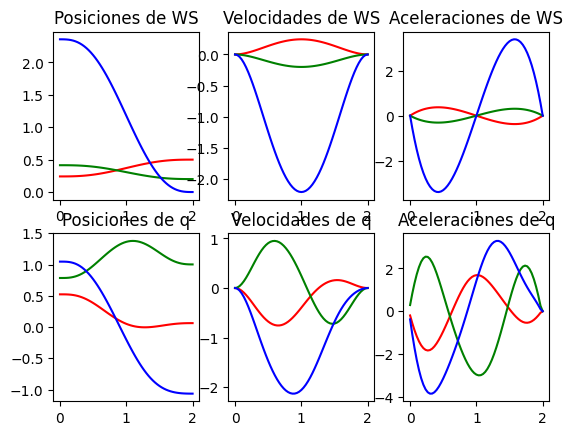

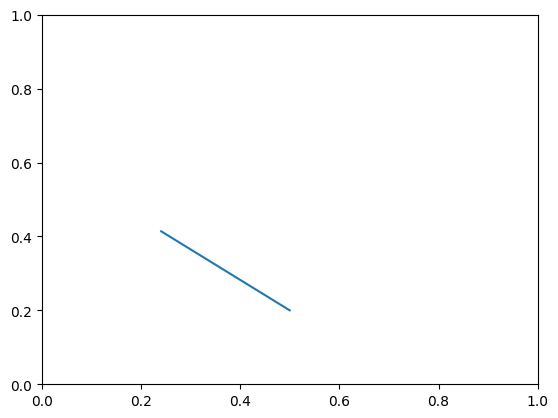

Calculando velocidades
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
Calculando pares
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


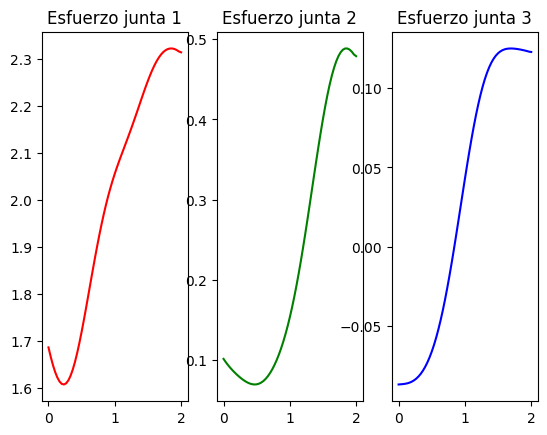

In [9]:
generador_trayectoria = GeneradorDinamica()
generador_trayectoria.cinematica_directa()
generador_trayectoria.generar_trayectoria()
generador_trayectoria.cinematica_inversa()
generador_trayectoria.graficar()
generador_trayectoria.graficar_ws()
generador_trayectoria.definir_inercia()
generador_trayectoria.posiciones_centro_masa()
generador_trayectoria.arreglo_velocidades()
generador_trayectoria.velocidades()
generador_trayectoria.lagrangiano()
generador_trayectoria.pares_juntas()
generador_trayectoria.graficar_esfuerzos()

### 4. Github
Para terminar, subir los archivos de la práctica al repositorio de github

## Análisis de resultados

¿Qué utilidad tiene el modelo de dinámica inversa de un robot?
> RESPUESTA

## Conclusiones

En esta sección deberan escribir las conclusiones de la práctica con base en el objetivo planteado y las metas que se deban cumplir para su realización.

## Bibliografía 

[1] W. Khalil y E. Dombre. “Chapter 9 - Dynamic modeling of serial robots”, en Modeling, Identification and Control of Robots, Butterworth-Heinemann, 2002, pp. 191–233. Accedido el 12 de mayo de 2025. [En línea]. Disponible: https://www.sciencedirect.com/science/article/pii/B9781903996669500099
[2] C. E. Valencia Murillo, J. M. Rico Martínez y J. J. Cervantes Sánchez, "Análisis dinámico inverso de mecanismos planos mediante ecuaciones diferenciales algebraicas," Verano de la Investigación Científica, vol. 2, no. 1, p. 1047, 2016. [En línea]. Disponible en: https://www.jovenesenlaciencia.ugto.mx/index.php/jovenesenlaciencia/article/download/1155/784/3675
[3] J. J. Craig, Introduction to Robotics: Mechanics and Control, 3ª ed., Pearson, 2005.
[4] G. B. Thomas, M. D. Weir, and J. Hass, Thomas' Calculus, 14th ed., Boston, MA, USA: Pearson, 2018.


